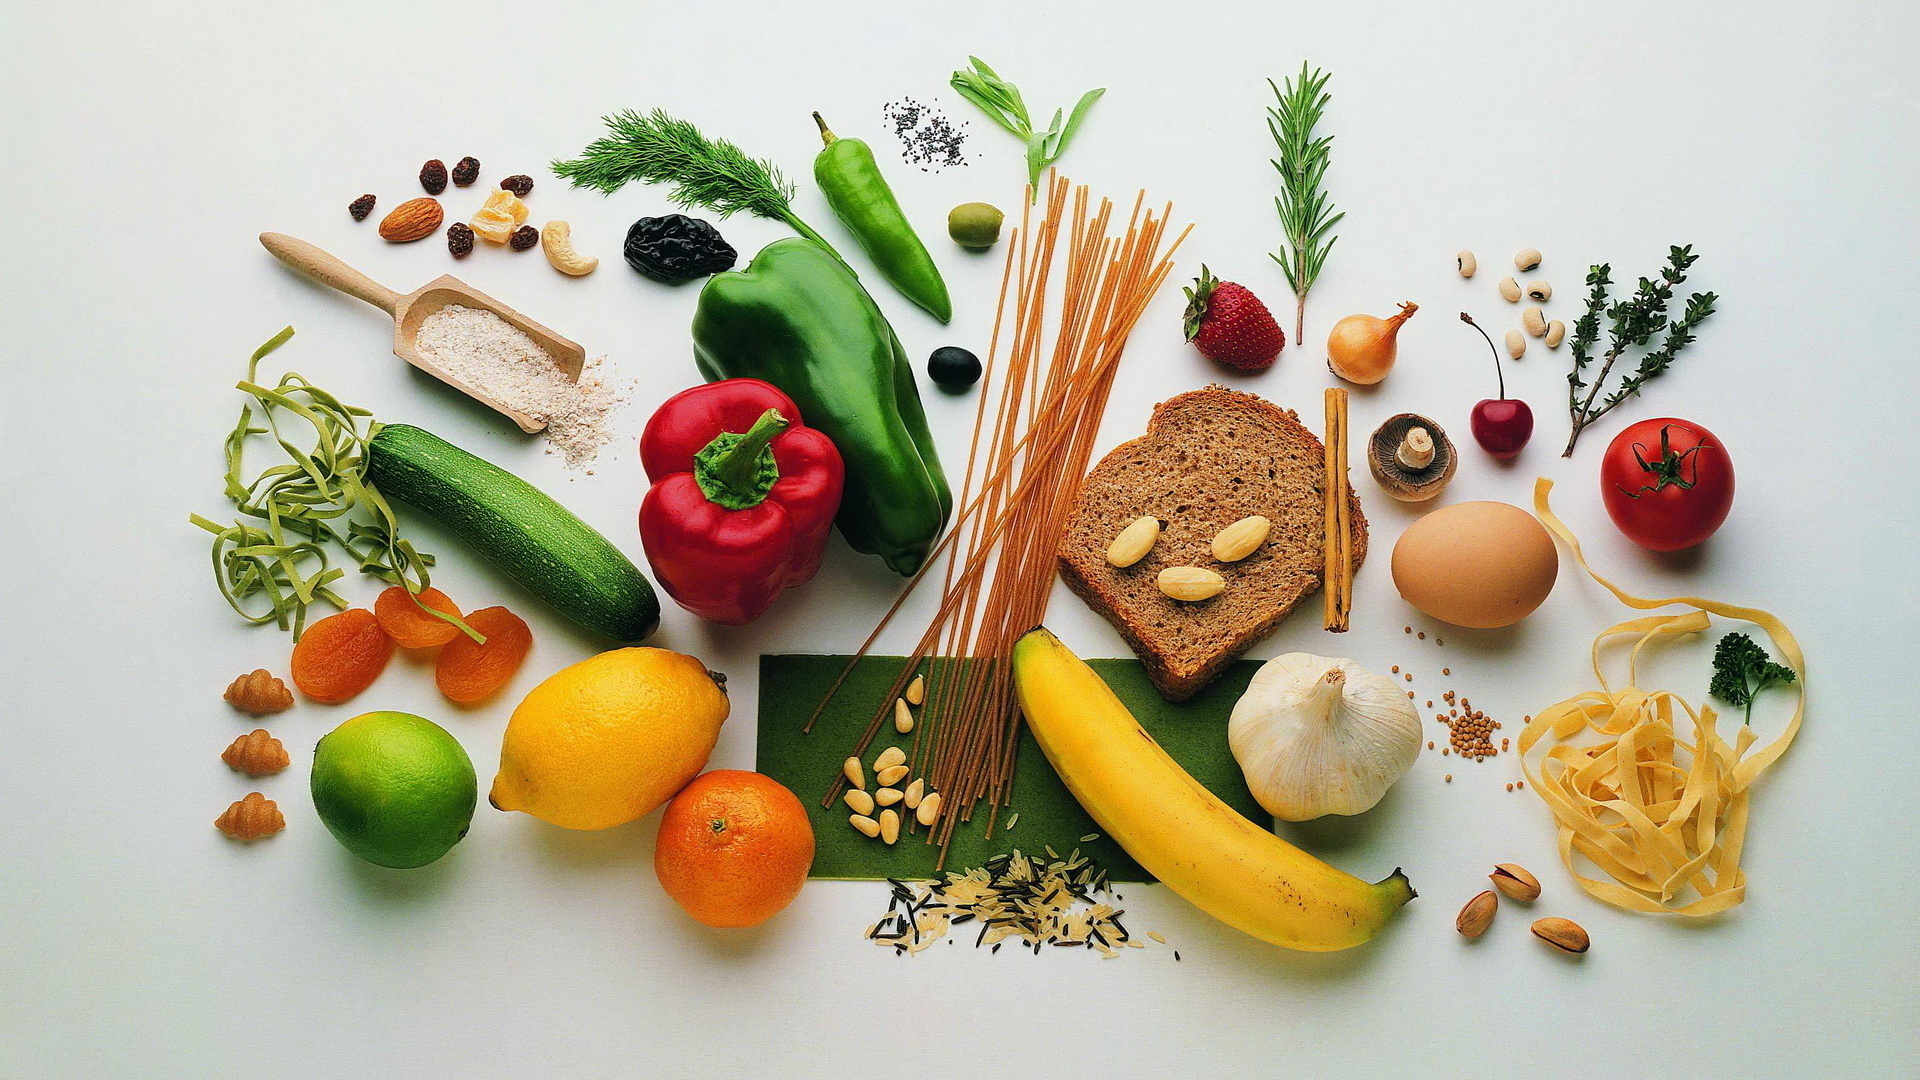

## Company Description:

**FoodWheel** is a startup <u>delivery service</u> that takes away the struggle of deciding where to eat.

**FoodWheel** picks you an amazing local restaurant and lets you order through the app. Senior leadership is getting ready for a big board meeting, and as a freelancer Data Analyst, I have been enlisted to help decipher data and create a presentation to answer several key questions:

What cuisines does FoodWheel offer? Which areas should the company search for more restaurants to partner with?
How has the average order amount changed over time? What does this say about the trajectory of the company?
How much has each customer on FoodWheel spent over the past six months? What can this tell us about the average FoodWheel customer?

### Datasets
The Manager provided me with two datasets;
> 1. The `restaurant` dataset
>
> 
> 3. The `order` dataset

### Columns description;


### `restaurant.csv`

* **id**: A unique identifier for each restaurant.
* **name**: The name of the restaurant.
* **neighborhood**: The neighborhood where the restaurant is located.
* **cuisine**: The type of cuisine the restaurant serves (e.g., Korean, Chinese, Pizza).

### `order.csv`

* **id**: A unique identifier for each order.
* **customer_id**: A unique identifier for the customer who made the order.
* **date**: The date when the order was made.
* **price**: The price of the order in dollars.


In [157]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import datetime

# Set visualization style
sns.set(style="whitegrid")

# Load datasets
restaurants = pd.read_csv(r"C:\Users\Ogunl\Desktop\Data Science\Dataset\foodwheel_\foodwheel\restaurants.csv")
orders = pd.read_csv(r"C:\Users\Ogunl\Desktop\Data Science\Dataset\foodwheel_\foodwheel\orders.csv")




## Exploratory Data Analysis

In [158]:
orders.head()

,id,customer_id,date,price
0,1,61,6-18-2017,13.0
1,2,210,5-8-2017,21.0
2,3,0,9-7-2017,33.0
3,4,66,7-7-2017,19.0
4,5,65,4-26-2017,13.0


In [159]:
restaurants.head()

,id,name,neighborhood,cuisine
0,1,Jongro BBQ,Midtown,Korean
1,2,Pocha 32,Midtown,Korean
2,3,Nom Wah Tea Parlor,Chinatown,Chinese
3,4,Roberta’s,Brooklyn,Pizza
4,5,Speedy Romeo,Brooklyn,Pizza


In [160]:
print("Orders DataFrame Info:")
orders.info()
print("\nRestaurants DataFrame Info:")
restaurants.info()

Orders DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           500 non-null    int64  
 1   customer_id  500 non-null    int64  
 2   date         500 non-null    object 
 3   price        500 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 15.8+ KB

Restaurants DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            44 non-null     int64 
 1   name          44 non-null     object
 2   neighborhood  44 non-null     object
 3   cuisine       44 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.5+ KB


In [161]:
print("Orders DataFrame Info:")
orders.describe()

Orders DataFrame Info:


,id,customer_id,price
count,500.000000,500.000000,500.000000
mean,250.500000,123.360000,17.900000
std,144.481833,73.830402,7.178933
min,1.000000,0.000000,3.000000
25%,125.750000,61.000000,13.000000
50%,250.500000,124.000000,17.000000
75%,375.250000,186.000000,22.000000
max,500.000000,249.000000,40.000000


In [ ]:

print("\nRestaurants DataFrame Info:")
restaurants.describe()

### Data Wrangling

In [391]:
# Convert date to datetime
orders['date'] = pd.to_datetime(orders['date'], format='%m-%d-%Y')
orders['year_month'] = orders['date'].dt.to_period('M').astype(str)
orders['month'] = orders['date'].dt.month_name()
orders['day_of_week'] = orders['date'].dt.day_name()

In [393]:
orders['date'] = pd.to_datetime(orders['date'], errors='coerce')

#### confirmation

In [395]:
orders.head()

,id,customer_id,date,price,year_month,day_of_week,month
0,1,61,2017-06-18,13.0,2017-06,Sunday,June
1,2,210,2017-05-08,21.0,2017-05,Monday,May
2,3,0,2017-09-07,33.0,2017-09,Thursday,September
3,4,66,2017-07-07,19.0,2017-07,Friday,July
4,5,65,2017-04-26,13.0,2017-04,Wednesday,April


In [166]:
cuisine_counts = restaurants['cuisine'].value_counts()
cuisine_neighborhood = pd.crosstab(restaurants['cuisine'], restaurants['neighborhood'])
# This will be used in Visualizations (barplot and heatmap)

In [167]:
print("Cuisine Counts:\n", cuisine_counts)

Cuisine Counts:
 cuisine
Chinese       11
American      10
Italian        8
Pizza          4
Vegetarian     4
Japanese       4
Korean         3
Name: count, dtype: int64


In [168]:
cuisine_neighborhood

neighborhood,Brooklyn,Chinatown,Downtown,Midtown,Queens,UWS,Uptown
cuisine,,,,,,,
American,1,0,5,2,0,0,2
Chinese,1,6,2,1,1,0,0
Italian,4,0,2,1,0,0,1
Japanese,0,0,3,1,0,0,0
Korean,0,0,0,3,0,0,0
Pizza,4,0,0,0,0,0,0
Vegetarian,0,1,2,0,0,1,0


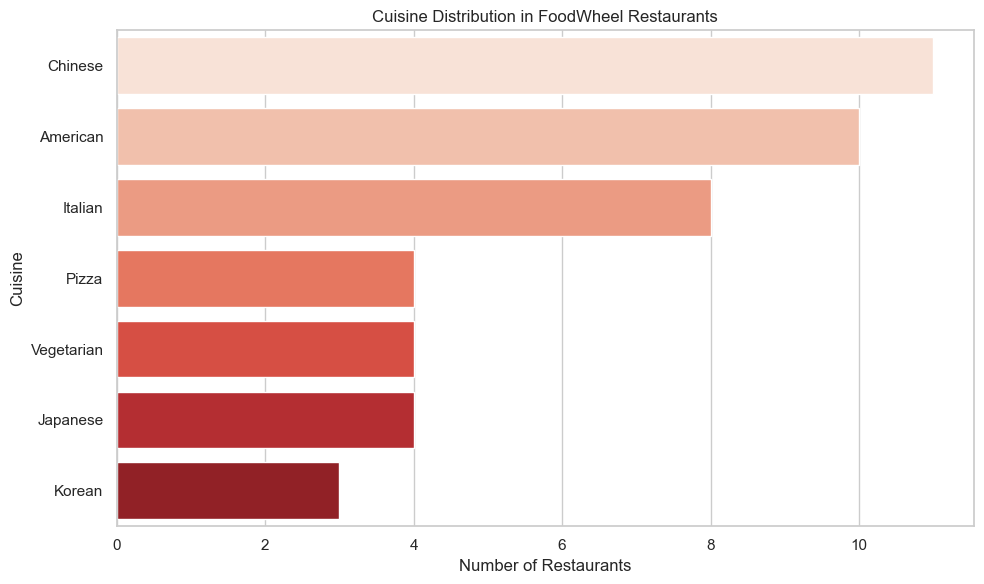

In [169]:
# Visualize cuisine distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=cuisine_counts.values, y=cuisine_counts.index, hue=cuisine_counts.index, palette='Reds', legend=False)
plt.title('Cuisine Distribution in FoodWheel Restaurants')
plt.xlabel('Number of Restaurants')
plt.ylabel('Cuisine')
plt.tight_layout()
plt.savefig('FW_cuisine_distribution.png')
plt.show()

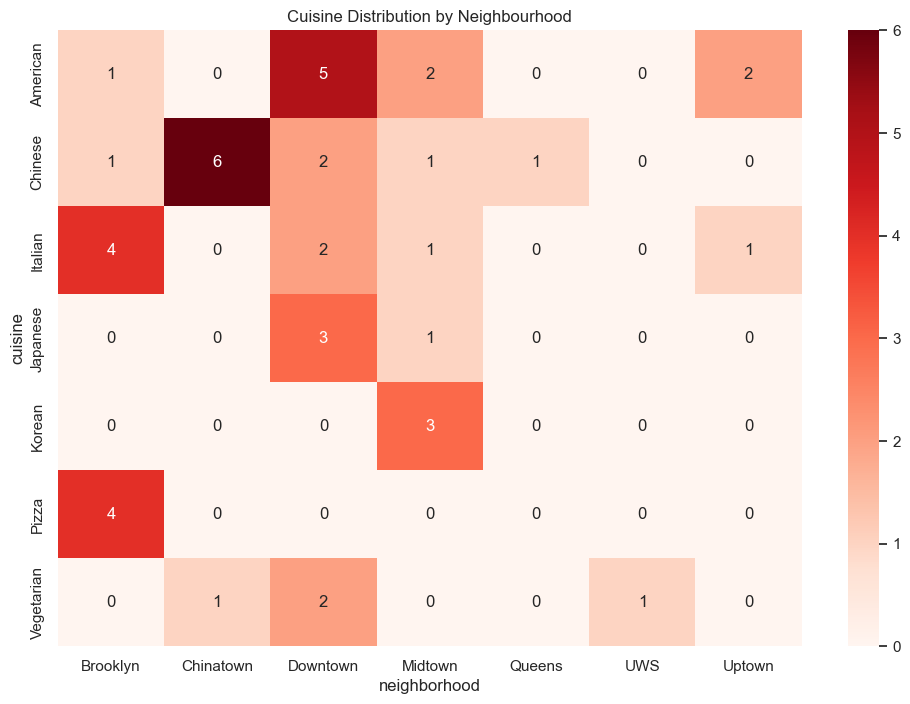

In [170]:
plt.figure(figsize=(12, 8))
sns.heatmap(cuisine_neighborhood, annot=True, cmap='Reds', fmt='d', cbar=True)
plt.title('Cuisine Distribution by Neighbourhood')
plt.savefig('FW_cuisine_neighborhood_heatmap.png')
plt.show()

### Average Order Amount Over Time



In [172]:
pivot_order_amount = orders.pivot_table(values='price', index='year_month', aggfunc=['mean', 'count']).reset_index()
pivot_order_amount.columns = ['year_month', 'avg_price', 'order_count']


In [173]:
pivot_order_amount

,year_month,avg_price,order_count
0,2017-04,9.609195,87
1,2017-05,14.858824,85
2,2017-06,15.152174,92
3,2017-07,18.012821,78
4,2017-08,21.150685,73
5,2017-09,29.505882,85


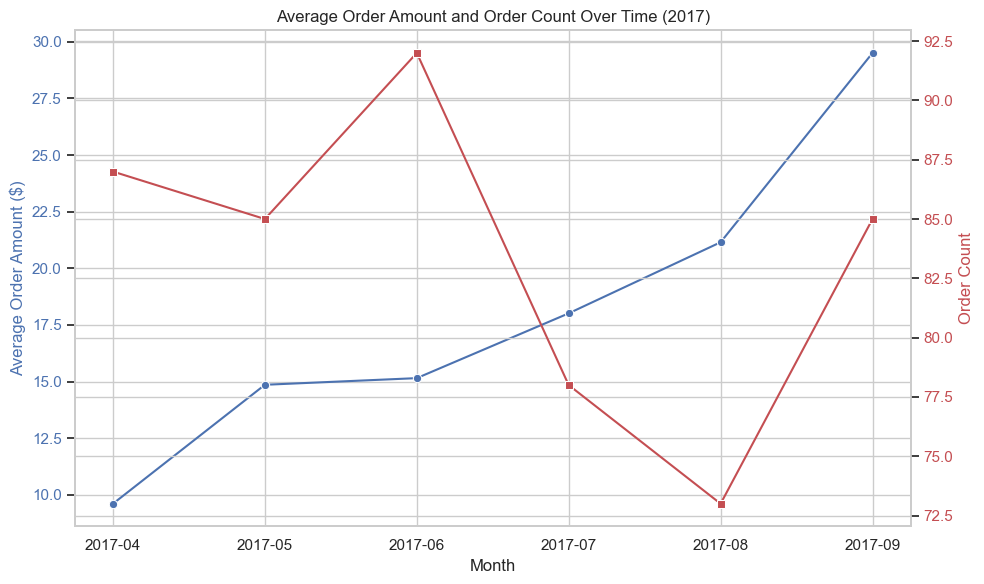

In [174]:
# Dual-axis line plot
# Visualize average order amount and order count
fig, ax1 = plt.subplots(figsize=(10, 6))
sns.lineplot(data=pivot_order_amount, x='year_month', y='avg_price', marker='o', color='b', ax=ax1, alpha = 1)
ax1.set_xlabel('Month')
ax1.set_ylabel('Average Order Amount ($)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax2 = ax1.twinx()
sns.lineplot(data=pivot_order_amount, x='year_month', y='order_count', marker='s', color='r', ax=ax2, alpha = 1)
ax2.set_ylabel('Order Count', color='r')
ax2.tick_params(axis='y', labelcolor='r')
plt.title('Average Order Amount and Order Count Over Time (2017)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('FW_order_trend_dual_axis.png')
plt.show()

In [175]:

# Statistical test: April vs. September prices
april_prices = orders[orders['year_month'] == '2017-04']['price']
september_prices = orders[orders['year_month'] == '2017-09']['price']
t_stat, p_value = stats.ttest_ind(april_prices, september_prices)
print(f"T-test for April vs. September prices: t={t_stat:.2f}, p-value={p_value:.4f}")

t_stat, p_value = stats.ttest_ind(april_prices, september_prices)

T-test for April vs. September prices: t=-35.62, p-value=0.0000


In [176]:
Growth_Income_overtime = ((pivot_order_amount['avg_price'].max() - pivot_order_amount['avg_price'].min()) / pivot_order_amount['avg_price'].min()) * 100
print(f"Growth in average price from lowest to highest month: {Growth_Income_overtime:.2f}%")


Growth in average price from lowest to highest month: 207.06%


### Customer Spending and Retention



In [178]:
customer_spending = orders.pivot_table(values='price', index='customer_id', aggfunc=['sum', 'count']).reset_index()
customer_spending.columns = ['customer_id', 'total_spending', 'order_count']
customer_spending['repeat_customer'] = customer_spending['order_count'] > 1


#### Customer segmentation based on IQR


In [179]:

# Calculate percentiles
percentiles = customer_spending['total_spending'].quantile([0.25, 0.50, 0.75])

# Display the results
print("Customer Spending Percentiles:")
print(percentiles)
print("\nInterpretation:")
print(f"- 25th Percentile (Q1): ${percentiles[0.25]:.2f} (Low-Value threshold)")
print(f"- 50th Percentile (Median): ${percentiles[0.50]:.2f}")
print(f"- 75th Percentile (Q3): ${percentiles[0.75]:.2f} (High-Value threshold)")

# Verify segment counts (approximate)
bins = [0, percentiles[0.25], percentiles[0.75], float('inf')]
labels = ['Low-Value', 'Mid-Value', 'High-Value']
customer_spending['segment'] = pd.cut(customer_spending['total_spending'], bins=bins, labels=labels, include_lowest=True)
segment_counts = customer_spending['segment'].value_counts(normalize=True) * 100
print("\nSegment Distribution (%):")
print(segment_counts)

Customer Spending Percentiles:
0.25    22.00
0.50    35.00
0.75    52.25
Name: total_spending, dtype: float64

Interpretation:
- 25th Percentile (Q1): $22.00 (Low-Value threshold)
- 50th Percentile (Median): $35.00
- 75th Percentile (Q3): $52.25 (High-Value threshold)

Segment Distribution (%):
segment
Mid-Value     49.107143
Low-Value     25.892857
High-Value    25.000000
Name: proportion, dtype: float64


#### Total Revenue

In [181]:
total_revenue_check = customer_spending['total_spending'].sum()
print(f"Calculated Total Revenue: ${total_revenue_check:.2f}")

Calculated Total Revenue: $8950.00 (Expected: $8,950)


In [182]:
customer_spending.head()

,customer_id,total_spending,order_count,repeat_customer,segment
0,0,83.0,5,True,High-Value
1,2,11.0,1,False,Low-Value
2,3,65.0,4,True,High-Value
3,4,32.0,2,True,Mid-Value
4,5,119.0,7,True,High-Value


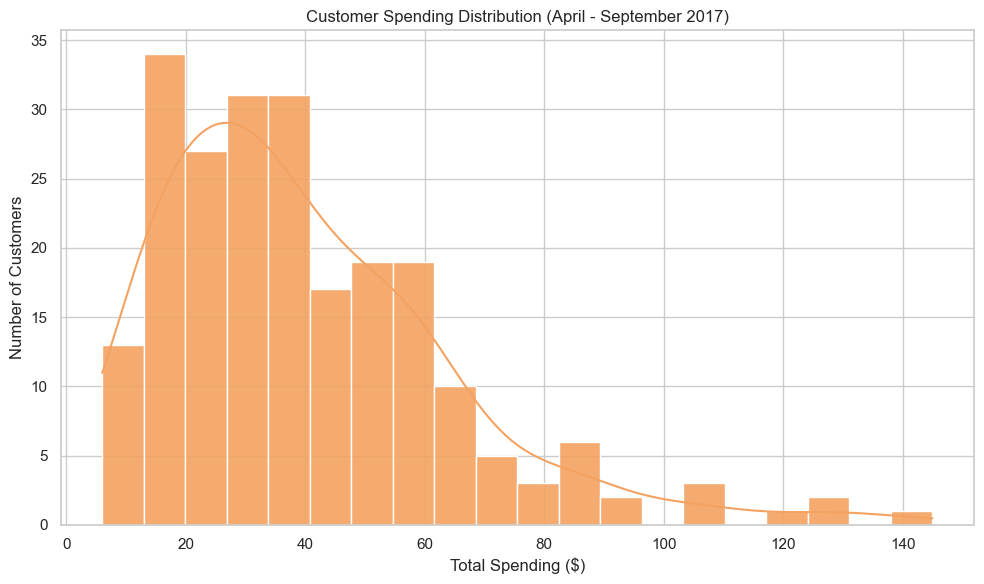

In [183]:
# Visualize spending distribution
plt.figure(figsize=(10, 6))
sns.histplot(customer_spending['total_spending'], bins=20, kde=True, color='#F4A261', alpha = 0.9 )
plt.title('Customer Spending Distribution (April - September 2017)')
plt.xlabel('Total Spending ($)')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.savefig('FW_customer_spending_distribution.png')
plt.show()

In [184]:
customer_spending.segment.value_counts()

segment
Mid-Value     110
Low-Value      58
High-Value     56
Name: count, dtype: int64

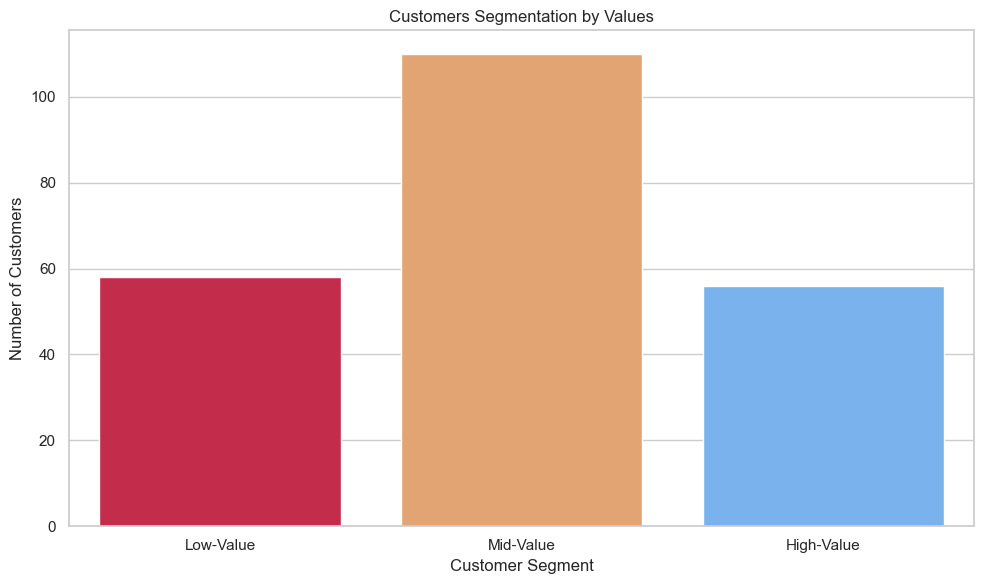

In [185]:
# Define custom palette: red, blue, green
custom_palette = ['#DC143C', '#F4A261', '#66B2FF']

# Visualize customer segments
plt.figure(figsize=(10, 6))
sns.countplot(data=customer_spending, x='segment', hue='segment', palette=custom_palette, legend=False)
plt.title('Customers Segmentation by Values')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.savefig('FW_customer_segmentation.png')
plt.show()

#### Customer retention

In [186]:
customer_spending.repeat_customer.value_counts()

repeat_customer
True     156
False     68
Name: count, dtype: int64

In [187]:
customer_spending.repeat_customer.value_counts(normalize=True)

repeat_customer
True     0.696429
False    0.303571
Name: proportion, dtype: float64

### We have 69.64% (approx. 70) returning back to make order

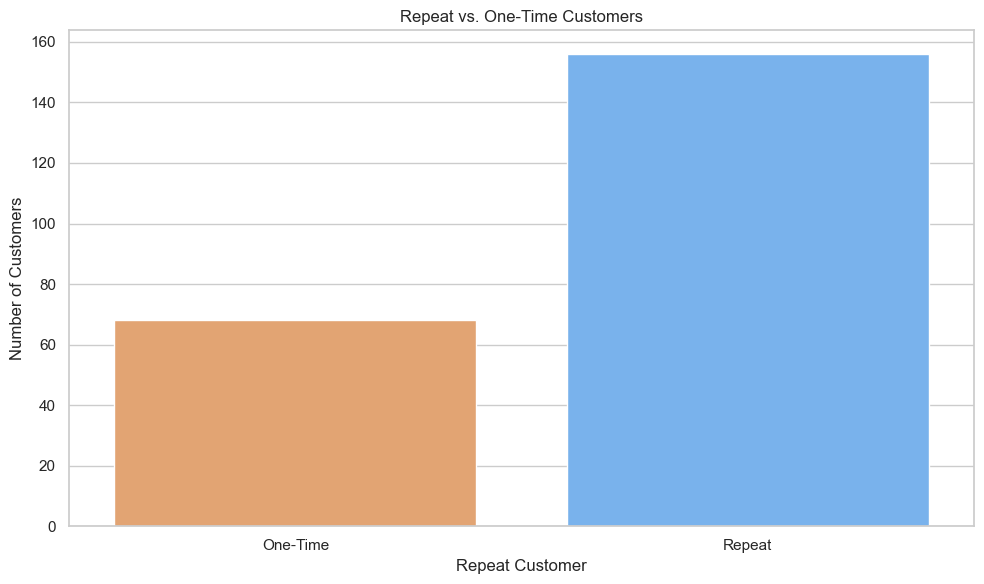

In [189]:
custom_palette = ['#F4A261', '#66B2FF']
# Visualize repeat vs. one-time customers
plt.figure(figsize=(10, 6))
sns.countplot(data=customer_spending, x='repeat_customer', hue='repeat_customer', palette=custom_palette, legend=False)
plt.title('Repeat vs. One-Time Customers')
plt.xlabel('Repeat Customer')
plt.ylabel('Number of Customers')
plt.xticks([0, 1], ['One-Time', 'Repeat'])
plt.tight_layout()
plt.savefig('FW_repeat_customers.png')
plt.show()

In [190]:
#Repeat by value
repeat_table = pd.crosstab(customer_spending.segment, customer_spending.repeat_customer).reset_index()
repeat_table

repeat_customer,segment,False,True
0,Low-Value,52,6
1,Mid-Value,16,94
2,High-Value,0,56


In [191]:
repeat_table['percent_repeat'] = (repeat_table[True] / (repeat_table[True] + repeat_table[False])) * 100
print(repeat_table.round(2))


repeat_customer     segment  False  True  percent_repeat
0                 Low-Value     52     6           10.34
1                 Mid-Value     16    94           85.45
2                High-Value      0    56          100.00


In [192]:
spending_per_seg = pd.crosstab(
    index=customer_spending['segment'],
    columns=customer_spending['repeat_customer'],
    values=customer_spending['total_spending'],
    aggfunc='mean'
).reset_index()
spending_per_seg

repeat_customer,segment,False,True
0,Low-Value,15.057692,18.166667
1,Mid-Value,30.250000,36.893617
2,High-Value,NaN,73.321429


In [198]:
repeat_table.set_index('segment', inplace=True)

In [199]:
repeat_table['True']

segment
Low-Value      6
Mid-Value     94
High-Value    56
Name: True, dtype: int64

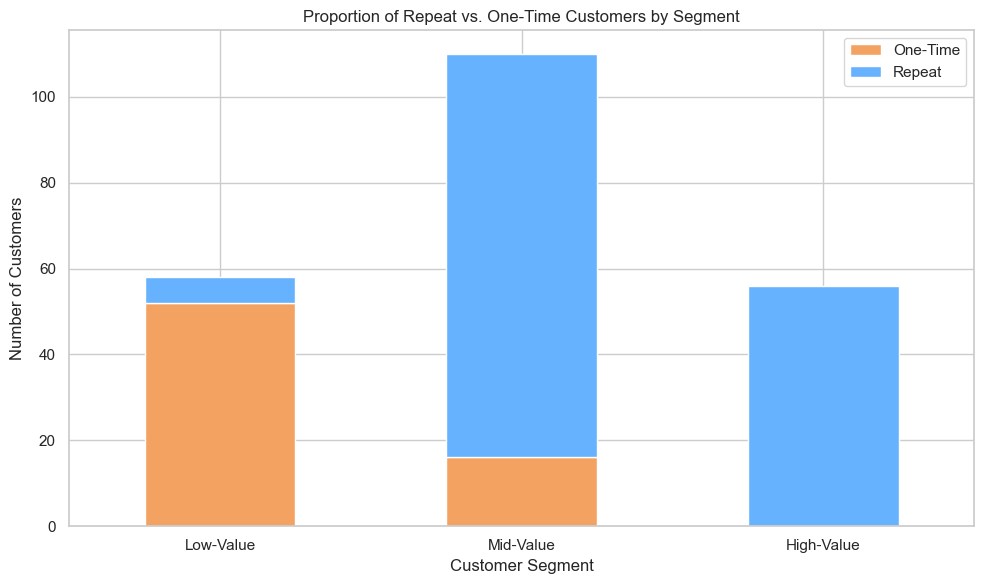

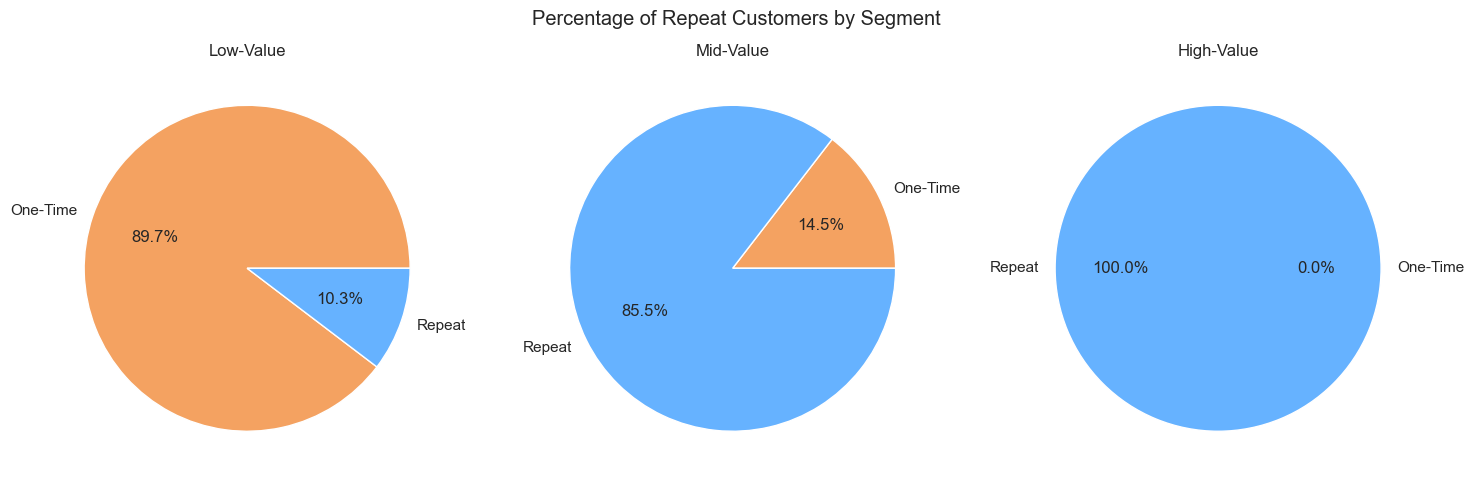

Repeat Customer Table:
             False  True  percent_repeat
segment                                
Low-Value      52     6       10.344828
Mid-Value      16    94       85.454545
High-Value      0    56      100.000000

Total Customers: 224 (Expected: 224)


In [200]:


# Create a stacked bar plot to show proportion of repeat vs. one-time customers
ax = repeat_table[['False', 'True']].plot(kind='bar', stacked=True, figsize=(10, 6), color=['#F4A261', '#66B2FF'])
plt.title('Proportion of Repeat vs. One-Time Customers by Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')
plt.legend(['One-Time', 'Repeat'], loc='upper right')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('FW_repeat_customers_proportion.png')
plt.show()

# Optional: Add a pie chart for percent_repeat to emphasize retention
fig, ax = plt.subplots(1, 3, figsize=(15, 5), subplot_kw=dict(aspect='equal'))
for i, segment in enumerate(repeat_table.index):
    ax[i].pie([100 - repeat_table.loc[segment, 'percent_repeat'], repeat_table.loc[segment, 'percent_repeat']], 
              labels=['One-Time', 'Repeat'], autopct='%1.1f%%', colors=['#F4A261', '#66B2FF'] ) #'#F4A261', '#A0E7E5'
    ax[i].set_title(segment)
plt.suptitle('Percentage of Repeat Customers by Segment')
plt.tight_layout()
plt.savefig('FW_repeat_customers_percentage.png')
plt.show()

# Print summary for verification
print("Repeat Customer Table:\n", repeat_table)
total_customers = repeat_table['False'].sum() + repeat_table['True'].sum()
print(f"\nTotal Customers: {total_customers}")

In [201]:
# Count orders per customer
customer_order_counts = orders.groupby('customer_id')['id'].count()

# Average orders per customer
avg_orders = customer_order_counts.mean()
print(f"Average orders per customer: {avg_orders:.2f}")


Average orders per customer: 2.23


In [413]:
customer_order_counts.head()

customer_id
0    5
2    1
3    4
4    2
5    7
Name: id, dtype: int64

In [423]:
#least order made by a customer
customer_order_counts.min()

1

In [421]:
#highest order made by a customer
customer_order_counts.max()

7

In [202]:
# Customers with 2 or more orders
two_plus = (customer_order_counts >= 2).sum()

# Proportion of those customers
percent_two_plus = (two_plus / customer_order_counts.shape[0]) * 100
print(f"Percentage of customers with 2+ orders: {percent_two_plus:.2f}%")


Percentage of customers with 2+ orders: 69.64%


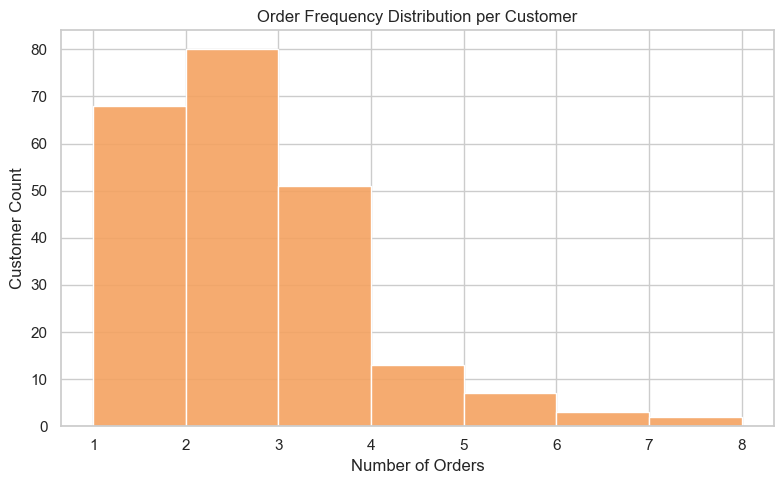

In [203]:
plt.figure(figsize=(8,5))
sns.histplot(customer_order_counts, bins=range(1,9), kde=False, color='#F4A261', alpha = 0.9)
plt.title('Order Frequency Distribution per Customer')
plt.xlabel('Number of Orders')
plt.ylabel('Customer Count')
plt.tight_layout()
plt.savefig('FW_Order Frequency Distribution per Customer.png')
plt.show()


### spending by segment

In [204]:
total_by_segment = customer_spending.groupby('segment')['total_spending'].sum().reset_index()
total_by_segment.columns = ['Segment', 'Total Spending']
total_by_segment

C:\Users\Ogunl\AppData\Local\Temp\ipykernel_27896\4130354503.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_by_segment = customer_spending.groupby('segment')['total_spending'].sum().reset_index()


,Segment,Total Spending
0,Low-Value,892.0
1,Mid-Value,3952.0
2,High-Value,4106.0


In [206]:
avg_by_segment = customer_spending.groupby('segment')['total_spending'].mean().reset_index()
avg_by_segment.columns = ['Segment', 'Average Spending']
avg_by_segment


C:\Users\Ogunl\AppData\Local\Temp\ipykernel_27896\4265761475.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_by_segment = customer_spending.groupby('segment')['total_spending'].mean().reset_index()


,Segment,Average Spending
0,Low-Value,15.379310
1,Mid-Value,35.927273
2,High-Value,73.321429


In [207]:
#Proportional contribution
total_sum = total_by_segment['Total Spending'].sum()
total_by_segment['Spending Proportion (%)'] = (total_by_segment['Total Spending'] / total_sum * 100).round(2)

# Display
total_by_segment.sort_values(by='Spending Proportion (%)', ascending=False)


C:\Users\Ogunl\AppData\Local\Temp\ipykernel_27896\3415270171.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_by_segment = customer_spending.groupby('segment')['total_spending'].sum().reset_index()


,Segment,Total Spending,Spending Proportion (%)
2,High-Value,4106.0,45.88
1,Mid-Value,3952.0,44.16
0,Low-Value,892.0,9.97


In [208]:
# Step 1: Calculate total spending by segment
total_by_segment = customer_spending.groupby('segment')['total_spending'].sum().reset_index()
total_by_segment.columns = ['Segment', 'Total Spending']

# Step 2: Add proportional contribution
total_sum = total_by_segment['Total Spending'].sum()
total_by_segment['Spending Proportion (%)'] = (total_by_segment['Total Spending'] / total_sum * 100).round(2)

# Display
total_by_segment


C:\Users\Ogunl\AppData\Local\Temp\ipykernel_27896\620018406.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_by_segment = customer_spending.groupby('segment')['total_spending'].sum().reset_index()


,Segment,Total Spending,Spending Proportion (%)
0,Low-Value,892.0,9.97
1,Mid-Value,3952.0,44.16
2,High-Value,4106.0,45.88


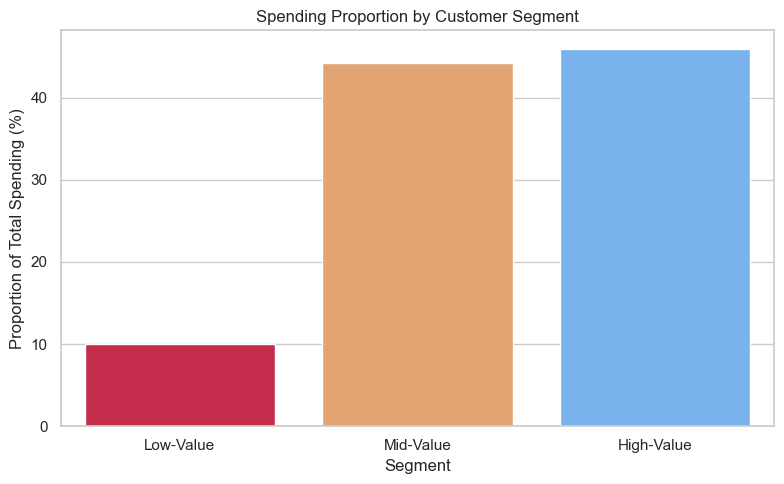

In [209]:

custom_palette = ['#DC143C', '#F4A261', '#66B2FF']
plt.figure(figsize=(8,5))
sns.barplot(x='Segment', y='Spending Proportion (%)', hue = 'Segment', data=total_by_segment.sort_values(by='Spending Proportion (%)', ascending=False), palette=custom_palette)
plt.title("Spending Proportion by Customer Segment")
plt.ylabel("Proportion of Total Spending (%)")
plt.xticks()
plt.tight_layout()
plt.savefig('FW_Spending Proportion by Customer Segment.png')
plt.show()


### Day-of-Week Analysis


In [211]:
day_of_week_pivot = orders.pivot_table(values='price', index='day_of_week', aggfunc=['mean', 'count']).reset_index()
day_of_week_pivot.columns = ['day_of_week', 'avg_price', 'order_count']
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [212]:
day_of_week_pivot

,day_of_week,avg_price,order_count
0,Friday,17.839080,87
1,Monday,17.933333,75
2,Saturday,18.073171,82
3,Sunday,17.513514,74
4,Thursday,17.938462,65
5,Tuesday,18.688525,61
6,Wednesday,17.303571,56


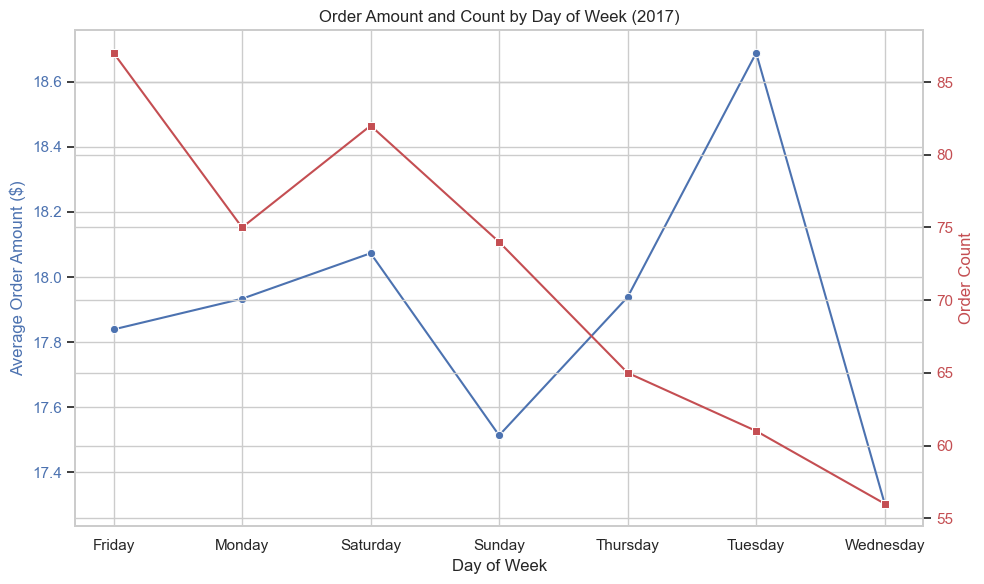

In [213]:
# Visualize day-of-week trends
fig, ax1 = plt.subplots(figsize=(10, 6))
sns.lineplot(data=day_of_week_pivot, x='day_of_week', y='avg_price', marker='o', color='b', ax=ax1)
ax1.set_xlabel('Day of Week')
ax1.set_ylabel('Average Order Amount ($)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax2 = ax1.twinx()
sns.lineplot(data=day_of_week_pivot, x='day_of_week', y='order_count', marker='s', color='r', ax=ax2)
ax2.set_ylabel('Order Count', color='r')
ax2.tick_params(axis='y', labelcolor='r')
plt.title('Order Amount and Count by Day of Week (2017)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('FW_day_of_week_trends.png')
plt.show()

In [214]:
print("Day-of-Week Order Counts:\n", orders['day_of_week'].value_counts())

Day-of-Week Order Counts:
 day_of_week
Friday       87
Saturday     82
Monday       75
Sunday       74
Thursday     65
Tuesday      61
Wednesday    56
Name: count, dtype: int64


### Order Price Distribution



In [403]:
orders.head()

,id,customer_id,date,price,year_month,day_of_week,month
0,1,61,2017-06-18,13.0,2017-06,Sunday,June
1,2,210,2017-05-08,21.0,2017-05,Monday,May
2,3,0,2017-09-07,33.0,2017-09,Thursday,September
3,4,66,2017-07-07,19.0,2017-07,Friday,July
4,5,65,2017-04-26,13.0,2017-04,Wednesday,April


#### Average order value: 
Average Order Value (AOV) is a crucial e-commerce metric that represents the average amount of money a customer spends each time they place an order on a website or mobile app.

**The formula for AOV is:**

$$\text{Average Order Value (AOV)} = \frac{\text{Total Revenue}}{\text{Total Number of Orders}}$$


In [405]:
total_revenue = orders['price'].sum()
total_orders = orders['id'].count()
aov = total_revenue / total_orders
print(f"Average Order Value (AOV): ${aov:.2f}")


Average Order Value (AOV): $17.90


#### This means that, on average, customers spent $17.90 per order during this period.

In [411]:
orders.customer_id.min()

0

#### Check out the order price stats

In [401]:
print("Order Price Stats:\n", orders['price'].describe())

Order Price Stats:
 count    500.000000
mean      17.900000
std        7.178933
min        3.000000
25%       13.000000
50%       17.000000
75%       22.000000
max       40.000000
Name: price, dtype: float64


In [217]:
Q1, Q2, Q3 = np.quantile(orders.price, [0.25, 0.50, 0.75])
Q1, Q2, Q3 

(13.0, 17.0, 22.0)

In [218]:
IQR = Q3 - Q1
IQR

9.0

In [219]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
lower_bound, upper_bound

(-0.5, 35.5)

In [220]:
outliers = orders[(orders['price'] < lower_bound) | (orders['price'] > upper_bound)]
outliers

,id,customer_id,date,price,year_month,day_of_week
76,77,93,2017-09-23,36.0,2017-09,Saturday
95,96,229,2017-09-06,38.0,2017-09,Wednesday
374,375,17,2017-09-04,40.0,2017-09,Monday


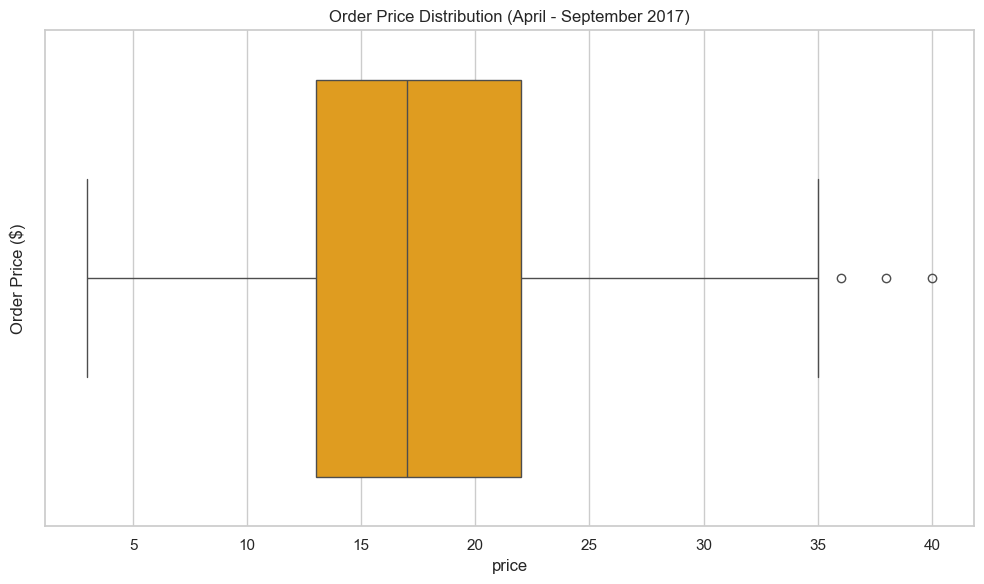

In [221]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=orders['price'], color='orange')
plt.title('Order Price Distribution (April - September 2017)')
plt.ylabel('Order Price ($)')
plt.tight_layout()
plt.savefig('FW_order_price_boxplot.png')
plt.show()

In [222]:
#least amount spent per order
orders['price'].min()

3.0

In [223]:
#highest amount spent per order
orders['price'].max()

40.0

In [224]:
orders.head()

,id,customer_id,date,price,year_month,day_of_week
0,1,61,2017-06-18,13.0,2017-06,Sunday
1,2,210,2017-05-08,21.0,2017-05,Monday
2,3,0,2017-09-07,33.0,2017-09,Thursday
3,4,66,2017-07-07,19.0,2017-07,Friday
4,5,65,2017-04-26,13.0,2017-04,Wednesday


In [225]:
#least price on one order at a time
print("Least price on one order at a time:", orders['price'].min())
print('\n')
orders.loc[orders['price'] == orders['price'].min()]


Least price on one order at a time: 3.0




,id,customer_id,date,price,year_month,day_of_week
161,162,199,2017-04-22,3.0,2017-04,Saturday


In [226]:
#highest price on one order at a time
print("Highest price on one order at a time:", orders['price'].max())
print('\n')
orders.loc[orders['price'] == orders['price'].max()]


Highest price on one order at a time: 40.0




,id,customer_id,date,price,year_month,day_of_week
374,375,17,2017-09-04,40.0,2017-09,Monday


In [227]:
#highest spender
print(customer_spending.loc[customer_spending['total_spending'].idxmax()])


customer_id                17
total_spending          145.0
order_count                 6
repeat_customer          True
segment            High-Value
Name: 15, dtype: object


In [228]:
orders.loc[orders['customer_id'] == 17]


,id,customer_id,date,price,year_month,day_of_week
54,55,17,2017-09-03,19.0,2017-09,Sunday
282,283,17,2017-06-16,17.0,2017-06,Friday
354,355,17,2017-06-26,14.0,2017-06,Monday
374,375,17,2017-09-04,40.0,2017-09,Monday
423,424,17,2017-09-22,25.0,2017-09,Friday
462,463,17,2017-09-07,30.0,2017-09,Thursday


In [229]:
customer_spending

,customer_id,total_spending,order_count,repeat_customer,segment
0,0,83.0,5,True,High-Value
1,2,11.0,1,False,Low-Value
2,3,65.0,4,True,High-Value
3,4,32.0,2,True,Mid-Value
4,5,119.0,7,True,High-Value
...,...,...,...,...,...
219,245,68.0,4,True,High-Value
220,246,16.0,2,True,Low-Value
221,247,35.0,1,False,Mid-Value
222,248,89.0,5,True,High-Value


In [230]:
#least spender
print(customer_spending.loc[customer_spending['total_spending'].idxmin()])


customer_id              160
total_spending           6.0
order_count                1
repeat_customer        False
segment            Low-Value
Name: 146, dtype: object


In [231]:
orders.loc[orders['customer_id'] == 160]


,id,customer_id,date,price,year_month,day_of_week
258,259,160,2017-04-26,6.0,2017-04,Wednesday


In [232]:
# Count orders per customer
customer_order_counts = orders.groupby('customer_id')['id'].count()

# Average orders per customer
avg_orders = customer_order_counts.mean()
print(f"Average orders per customer: {avg_orders:.2f}")


Average orders per customer: 2.23


In [233]:
# Customers with 2 or more orders
two_plus = (customer_order_counts >= 2).sum()

# Proportion of those customers
percent_two_plus = (two_plus / customer_order_counts.shape[0]) * 100
print(f"Percentage of customers with 2+ orders: {percent_two_plus:.2f}%")


Percentage of customers with 2+ orders: 69.64%


### RFM ANALYSIS

In [235]:
current_date = orders['date'].max()
rfm = orders.groupby('customer_id').agg({'date': lambda x: (current_date - x.max()).days, 'price': ['count', 'sum']}).reset_index()
rfm.columns = ['customer_id', 'recency', 'frequency', 'monetary']


In [237]:
rfm.head()

,customer_id,recency,frequency,monetary
0,0,22,5,83.0
1,2,178,1,11.0
2,3,48,4,65.0
3,4,49,2,32.0
4,5,70,7,119.0


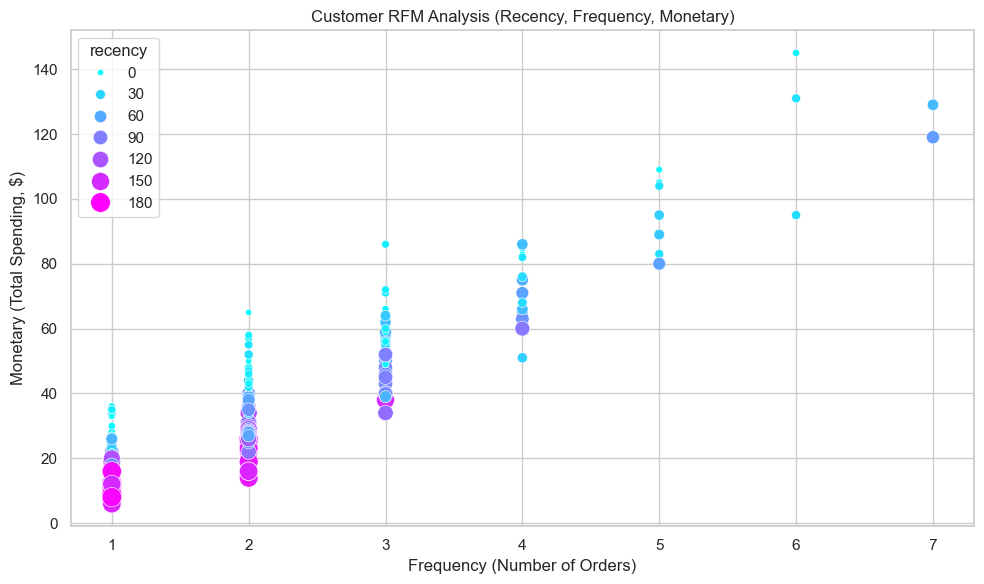

In [236]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm, x='frequency', y='monetary', size='recency', hue='recency', palette='cool', sizes=(20, 200))
plt.title('Customer RFM Analysis (Recency, Frequency, Monetary)')
plt.xlabel('Frequency (Number of Orders)')
plt.ylabel('Monetary (Total Spending, $)')
plt.tight_layout()
plt.savefig('FW_rfm_analysis.png')
plt.show()

In [238]:
rfm.recency.max()

180

In [239]:
#update the rfm
rfm['R_score'] = pd.qcut(rfm['recency'], 5, labels=[5,4,3,2,1])
rfm['F_score'] = pd.qcut(rfm['frequency'].rank(method='first'), 5, labels=[1,2,3,4,5])
rfm['M_score'] = pd.qcut(rfm['monetary'], 5, labels=[1,2,3,4,5])
rfm['RFM_Score'] = rfm['R_score'].astype(str) + rfm['F_score'].astype(str) + rfm['M_score'].astype(str)
rfm.head()

,customer_id,recency,frequency,monetary,R_score,F_score,M_score,RFM_Score
0,0,22,5,83.0,4,5,5,455
1,2,178,1,11.0,1,1,1,111
2,3,48,4,65.0,3,5,5,355
3,4,49,2,32.0,3,2,3,323
4,5,70,7,119.0,3,5,5,355


### RFM breakdown

In [241]:
#Combine into one RFM Score
rfm['RFM_Score'] = (
    rfm['R_score'].astype(str) + 
    rfm['F_score'].astype(str) + 
    rfm['M_score'].astype(str)
)

#Define segment mapping based on RFM patterns
def classify_segment(rfm):
    if rfm == '555':
        return 'Champions'
    elif rfm.startswith('5') and rfm[1] in ['4','5']:
        return 'Loyal'
    elif rfm.startswith('1') and rfm[1] in ['4','5']:
        return 'At-Risk'
    elif rfm.endswith('5') and rfm[0] in ['1','2']:
        return 'Big Spenders - Slipping'
    else:
        return 'Low-Value'

# Apply classification
rfm['Segment'] = rfm['RFM_Score'].apply(classify_segment)


In [242]:
rfm.head()

,customer_id,recency,frequency,monetary,R_score,F_score,M_score,RFM_Score,Segment
0,0,22,5,83.0,4,5,5,455,Low-Value
1,2,178,1,11.0,1,1,1,111,Low-Value
2,3,48,4,65.0,3,5,5,355,Low-Value
3,4,49,2,32.0,3,2,3,323,Low-Value
4,5,70,7,119.0,3,5,5,355,Low-Value


In [243]:
rfm.recency.mean()

65.63392857142857

In [244]:
rfm.monetary.mean()

39.955357142857146

In [245]:
rfm.frequency.mean()

2.232142857142857

In [246]:
rfm

,customer_id,recency,frequency,monetary,R_score,F_score,M_score,RFM_Score,Segment
0,0,22,5,83.0,4,5,5,455,Low-Value
1,2,178,1,11.0,1,1,1,111,Low-Value
2,3,48,4,65.0,3,5,5,355,Low-Value
3,4,49,2,32.0,3,2,3,323,Low-Value
4,5,70,7,119.0,3,5,5,355,Low-Value
...,...,...,...,...,...,...,...,...,...
219,245,27,4,68.0,4,5,5,455,Low-Value
220,246,154,2,16.0,1,4,1,141,At-Risk
221,247,11,1,35.0,5,2,3,523,Low-Value
222,248,39,5,89.0,4,5,5,455,Low-Value


In [247]:
def simulate_segment(recency, frequency, monetary, rfm_df):
    # Create a temporary DataFrame
    temp_df = pd.DataFrame({
        'recency': [recency],
        'frequency': [frequency],
        'monetary': [monetary]
    })

    # Apply the same scoring logic
    temp_df['R_score'] = pd.qcut(rfm['recency'], 5, labels=[5,4,3,2,1]).iloc[0]
    temp_df['F_score'] = pd.qcut(rfm['frequency'].rank(method='first'), 5, labels=[1,2,3,4,5]).iloc[0]
    temp_df['M_score'] = pd.qcut(rfm['monetary'], 5, labels=[1,2,3,4,5]).iloc[0]

    # Use same segment logic
    rfm_d = f"{temp_df['R_score'][0]}{temp_df['F_score'][0]}{temp_df['M_score'][0]}"
    segment = classify_segment(rfm_d)
    
    return rfm_d, segment


In [248]:
simulate_segment(5,16,56, rfm)

('455', 'Low-Value')

In [249]:
# Label churn based on recency (e.g., if no purchase in last 90 days)
rfm['churned'] = rfm['recency'] > 90
rfm['churned'] = rfm['churned'].astype(int)  # 1 = churned, 0 = active


features = rfm[['recency', 'frequency', 'monetary']]
target = rfm['churned']


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Fit model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

rfm['churn_risk'] = model.predict_proba(features)[:, 1]  # Probability of churn

top_risk = rfm.sort_values(by='churn_risk', ascending=False).head(10)
top_risk

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      1.00      1.00        23

    accuracy                           1.00        68
   macro avg       1.00      1.00      1.00        68
weighted avg       1.00      1.00      1.00        68



,customer_id,recency,frequency,monetary,R_score,F_score,M_score,RFM_Score,Segment,churned,churn_risk
81,90,129,2,34.0,1,3,3,133,Low-Value,1,1.0
147,161,159,1,8.0,1,2,1,121,Low-Value,1,1.0
30,33,151,1,13.0,1,1,1,111,Low-Value,1,1.0
174,191,130,2,29.0,1,3,2,132,Low-Value,1,1.0
36,40,170,2,26.0,1,2,2,122,Low-Value,1,1.0
46,50,172,1,7.0,1,1,1,111,Low-Value,1,1.0
49,54,132,2,29.0,1,2,2,122,Low-Value,1,1.0
207,232,151,1,12.0,1,2,1,121,Low-Value,1,1.0
182,202,138,1,19.0,1,2,1,121,Low-Value,1,1.0
57,65,156,2,25.0,1,2,2,122,Low-Value,1,1.0


In [250]:
rfm.head()

,customer_id,recency,frequency,monetary,R_score,F_score,M_score,RFM_Score,Segment,churned,churn_risk
0,0,22,5,83.0,4,5,5,455,Low-Value,0,2.674463e-31
1,2,178,1,11.0,1,1,1,111,Low-Value,1,1.000000e+00
2,3,48,4,65.0,3,5,5,355,Low-Value,0,6.439048e-20
3,4,49,2,32.0,3,2,3,323,Low-Value,0,3.904564e-19
4,5,70,7,119.0,3,5,5,355,Low-Value,0,5.014806e-11


In [251]:
rfm.Segment.value_counts(normalize = True)

Segment
Low-Value                  0.888393
Loyal                      0.049107
Champions                  0.035714
At-Risk                    0.017857
Big Spenders - Slipping    0.008929
Name: proportion, dtype: float64

In [252]:
rfm.shape


(224, 11)

In [253]:
rfm.shape

(224, 11)

In [254]:
rfm.max()

customer_id      249
recency          180
frequency          7
monetary       145.0
R_score            1
F_score            5
M_score            5
RFM_Score        555
Segment        Loyal
churned            1
churn_risk       1.0
dtype: object

In [255]:
rfm

,customer_id,recency,frequency,monetary,R_score,F_score,M_score,RFM_Score,Segment,churned,churn_risk
0,0,22,5,83.0,4,5,5,455,Low-Value,0,2.674463e-31
1,2,178,1,11.0,1,1,1,111,Low-Value,1,1.000000e+00
2,3,48,4,65.0,3,5,5,355,Low-Value,0,6.439048e-20
3,4,49,2,32.0,3,2,3,323,Low-Value,0,3.904564e-19
4,5,70,7,119.0,3,5,5,355,Low-Value,0,5.014806e-11
...,...,...,...,...,...,...,...,...,...,...,...
219,245,27,4,68.0,4,5,5,455,Low-Value,0,5.486037e-29
220,246,154,2,16.0,1,4,1,141,At-Risk,1,1.000000e+00
221,247,11,1,35.0,5,2,3,523,Low-Value,0,1.607877e-35
222,248,39,5,89.0,4,5,5,455,Low-Value,0,4.780369e-24


<function matplotlib.pyplot.show(close=None, block=None)>

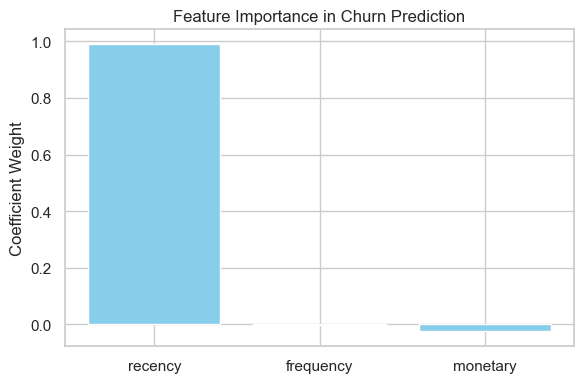

In [256]:

importance = model.coef_[0]
features = ['recency', 'frequency', 'monetary']

plt.figure(figsize=(6,4))
plt.bar(features, importance, color='skyblue')
plt.title("Feature Importance in Churn Prediction")
plt.ylabel("Coefficient Weight")
plt.tight_layout()
plt.show #This helps you understand what’s driving churn—recency usually dominates.


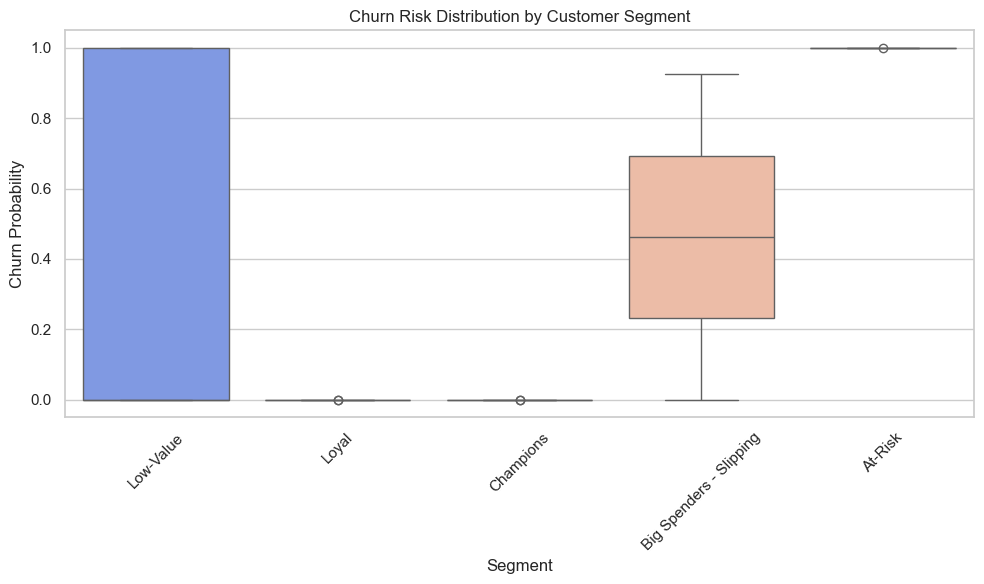

In [257]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Segment', hue = 'Segment', y='churn_risk', data=rfm, palette='coolwarm')
plt.title('Churn Risk Distribution by Customer Segment')
plt.ylabel('Churn Probability')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [258]:
rfm['retention_flag'] = (rfm['churn_risk'] > 0.7).astype(int)
rfm =rfm.reset_index()
rfm

,index,customer_id,recency,frequency,monetary,R_score,F_score,M_score,RFM_Score,Segment,churned,churn_risk,retention_flag
0,0,0,22,5,83.0,4,5,5,455,Low-Value,0,2.674463e-31,0
1,1,2,178,1,11.0,1,1,1,111,Low-Value,1,1.000000e+00,1
2,2,3,48,4,65.0,3,5,5,355,Low-Value,0,6.439048e-20,0
3,3,4,49,2,32.0,3,2,3,323,Low-Value,0,3.904564e-19,0
4,4,5,70,7,119.0,3,5,5,355,Low-Value,0,5.014806e-11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,219,245,27,4,68.0,4,5,5,455,Low-Value,0,5.486037e-29,0
220,220,246,154,2,16.0,1,4,1,141,At-Risk,1,1.000000e+00,1
221,221,247,11,1,35.0,5,2,3,523,Low-Value,0,1.607877e-35,0
222,222,248,39,5,89.0,4,5,5,455,Low-Value,0,4.780369e-24,0


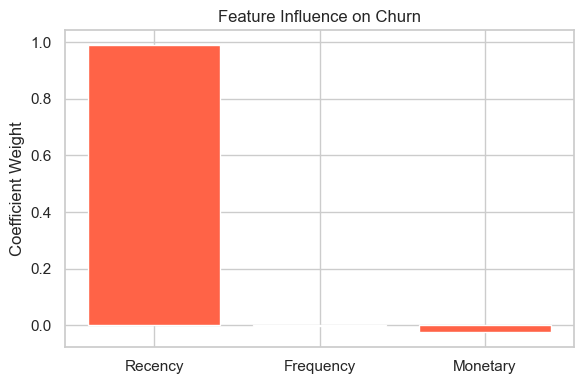

In [259]:
# Grab coefficients and plot them
coeffs = model.coef_[0]
features = ['Recency', 'Frequency', 'Monetary']

plt.figure(figsize=(6,4))
plt.bar(features, coeffs, color='tomato')
plt.title("Feature Influence on Churn")
plt.ylabel("Coefficient Weight")
plt.tight_layout()
plt.show()


Interpretation: A large positive coefficient for Recency means customers with higher days since last order are much more likely to churn.

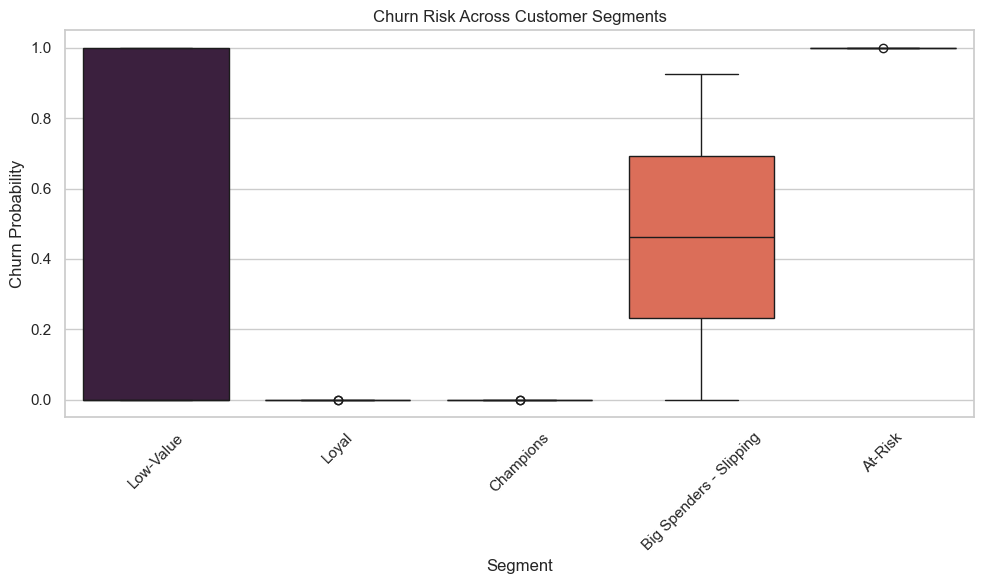

In [261]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Segment', y='churn_risk', hue= 'Segment', data=rfm, palette='rocket')
plt.title('Churn Risk Across Customer Segments')
plt.ylabel('Churn Probability')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [262]:
rfm['retention_flag'] = (rfm['churn_risk'] > 0.7).astype(int)


In [263]:
high_risk_customers = rfm[rfm['retention_flag'] == 1]
vip_at_risk = high_risk_customers[high_risk_customers['Segment'].isin(['Champions', 'Loyal'])]


In [264]:
def retention_message(segment, name):
    if segment == 'Champions':
        return f"{name}, we miss you! As one of our top customers, enjoy an exclusive discount to bring you back."
    elif segment == 'At-Risk':
        return f"{name}, we noticed you haven’t ordered in a while. Here's a personalized offer—just for you."
    else:
        return f"{name}, explore something new! A special treat awaits on your next order."

rfm['retention_message'] = rfm.apply(lambda row: retention_message(row['Segment'], f"Customer {row['customer_id']}"), axis=1)


In [265]:
print(rfm.columns.tolist())


['index', 'customer_id', 'recency', 'frequency', 'monetary', 'R_score', 'F_score', 'M_score', 'RFM_Score', 'Segment', 'churned', 'churn_risk', 'retention_flag', 'retention_message']


In [266]:
rfm.head()

,index,customer_id,recency,frequency,monetary,R_score,F_score,M_score,RFM_Score,Segment,churned,churn_risk,retention_flag,retention_message
0,0,0,22,5,83.0,4,5,5,455,Low-Value,0,2.674463e-31,0,"Customer 0, explore something new! A special t..."
1,1,2,178,1,11.0,1,1,1,111,Low-Value,1,1.000000e+00,1,"Customer 2, explore something new! A special t..."
2,2,3,48,4,65.0,3,5,5,355,Low-Value,0,6.439048e-20,0,"Customer 3, explore something new! A special t..."
3,3,4,49,2,32.0,3,2,3,323,Low-Value,0,3.904564e-19,0,"Customer 4, explore something new! A special t..."
4,4,5,70,7,119.0,3,5,5,355,Low-Value,0,5.014806e-11,0,"Customer 5, explore something new! A special t..."


In [267]:
rfm.monetary.mean()

39.955357142857146

### Is there anything to make of the names of restaurants?

In [269]:
restaurants.head()

,id,name,neighborhood,cuisine
0,1,Jongro BBQ,Midtown,Korean
1,2,Pocha 32,Midtown,Korean
2,3,Nom Wah Tea Parlor,Chinatown,Chinese
3,4,Roberta’s,Brooklyn,Pizza
4,5,Speedy Romeo,Brooklyn,Pizza


In [270]:
res = pd.crosstab(restaurants['name'], restaurants['cuisine']).reset_index()

In [271]:
res

cuisine,name,American,Chinese,Italian,Japanese,Korean,Pizza,Vegetarian
0,Ayurveda,0,0,0,0,0,0,1
1,Baohaus,0,1,0,0,0,0,0
2,Buddha Bodai,0,0,0,0,0,0,1
3,Carbone,0,0,1,0,0,0,0
4,Dan and John's Wings,1,0,0,0,0,0,0
5,Di Fara Pizza,0,0,0,0,0,1,0
6,Dirt Candy,0,0,0,0,0,0,1
7,Foodcademy,1,0,0,0,0,0,0
8,Golden Unicorn,0,1,0,0,0,0,0
9,Great NY Noodletown,0,1,0,0,0,0,0


In [272]:
res.name.value_counts()

name
Ayurveda                      1
Baohaus                       1
Nan Xiang Xiao Long Bao       1
Nom Wah Tea Parlor            1
Ping's Seafood                1
Pocha 32                      1
Rao's                         1
Roberta’s                     1
Russ & Daughters              1
Scorpio Sisters               1
Shake Shack                   1
Smalls Jazz Club              1
Sonnyboy's                    1
Speedy Romeo                  1
The Cole Romano Experience    1
The Meatball Shop             1
Timbo Slice                   1
Wo Hop                        1
X'ian Famous Foods            1
XO Kitchen                    1
Yakitori Taisho               1
N.E.D                         1
Mission Chinese Food          1
Minca                         1
I Sodi                        1
Buddha Bodai                  1
Carbone                       1
Dan and John's Wings          1
Di Fara Pizza                 1
Dirt Candy                    1
Foodcademy                    1
Gol

In [273]:
res.shape

(44, 8)

In [274]:
# List all cuisine columns
cuisine_columns = ['American', 'Chinese', 'Italian', 'Japanese', 'Korean', 'Pizza', 'Vegetarian']

# Sum across the cuisine columns row-wise
res['num_cuisines'] = res[cuisine_columns].sum(axis=1)
res

cuisine,name,American,Chinese,Italian,Japanese,Korean,Pizza,Vegetarian,num_cuisines
0,Ayurveda,0,0,0,0,0,0,1,1
1,Baohaus,0,1,0,0,0,0,0,1
2,Buddha Bodai,0,0,0,0,0,0,1,1
3,Carbone,0,0,1,0,0,0,0,1
4,Dan and John's Wings,1,0,0,0,0,0,0,1
5,Di Fara Pizza,0,0,0,0,0,1,0,1
6,Dirt Candy,0,0,0,0,0,0,1,1
7,Foodcademy,1,0,0,0,0,0,0,1
8,Golden Unicorn,0,1,0,0,0,0,0,1
9,Great NY Noodletown,0,1,0,0,0,0,0,1
